# $A_{1u}-S$ Junction

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from hamiltonians import Hamiltonian_A1u_S
%matplotlib notebook

L_x = 30
L_y = 30
t = 1
Delta = 1
mu = -2
Phi = 0.5*np.pi   #superconducting phase
t_J = 1    #t/2

params = dict(t=t, mu=mu, Delta=Delta, t_J=t_J,
              Phi=Phi)

eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian_A1u_S(t=t, mu=mu, L_x=L_x, L_y=L_y, Delta=Delta, t_J=t_J, Phi=Phi))
zero_modes = eigenvectors[:, 2*(L_x*L_y-1):2*(L_x*L_y+1)]      #4 (2) modes with zero energy (with Zeeman)

creation_up = []  
creation_down = []
destruction_down = []
destruction_up = []
for i in range(4):      #each list has 4 elements corresponding to the 4 degenerated energies
    destruction_up.append((zero_modes[0::4, i]).reshape((L_x, L_y)))
    destruction_down.append((zero_modes[1::4, i]).reshape((L_x, L_y)))
    creation_down.append((zero_modes[2::4, i]).reshape((L_x, L_y)))
    creation_up.append((zero_modes[3::4, i]).reshape((L_x, L_y)))

probability_density = np.zeros((L_x,L_y, 4))
for i in range(4):      #each list has 4 elements corresponding to the 4 degenerated energies, if Zeeman is on only index 1 and 2 are degenerate
    probability_density[:,:,i] = np.abs(creation_up[i])**2 + np.abs(creation_down[i])**2 + np.abs(destruction_down[i])**2 + np.abs(destruction_up[i])**2


# Zero modes vs $\Phi$

<IPython.core.display.Javascript object>


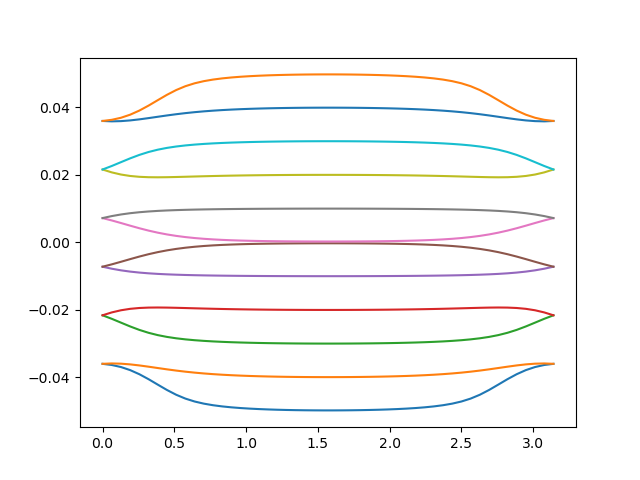

In [19]:
Phi = np.linspace(0, np.pi, 50)
L_x = 50
L_y = 50
fig, ax = plt.subplots(num="Spectrum vs. phi")
energies = []
for Phi_value in Phi:
    eigenvalues = np.linalg.eigvalsh(Hamiltonian_A1u_S(t=t, mu=mu, L_x=L_x, L_y=L_y, Delta=Delta, t_J=t_J, Phi=Phi_value))
    energies.append(eigenvalues[2*(L_x*L_y-3):2*(L_x*L_y+3)])
    #print(Phi_value)
ax.plot(Phi, energies)
